In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nyhpi_data = pd.read_csv('NYSTHPI.csv')

In [3]:
#Convert exchange rate to a number and remove NAs.
nyhpi_data['price'] = pd.to_numeric(nyhpi_data.NYSTHPI, errors='coerce')
nyhpi_data.dropna(inplace=True)

In [4]:
print(nyhpi_data.head())

         DATE  NYSTHPI   price
0  2000-01-01   336.54  336.54
1  2000-04-01   346.69  346.69
2  2000-07-01   356.79  356.79
3  2000-10-01   362.24  362.24
4  2001-01-01   370.45  370.45


In [30]:
print(nyhpi_data.tail())

                  DATE  NYSTHPI   price  diff_1
DATE                                           
2016-07-01  2016-07-01   624.06  624.06    8.84
2016-10-01  2016-10-01   630.73  630.73    6.67
2017-01-01  2017-01-01   634.42  634.42    3.69
2017-04-01  2017-04-01   645.36  645.36   10.94
2017-07-01  2017-07-01   658.07  658.07   12.71


In [5]:
nyhpi_data.isnull().values.any()

False

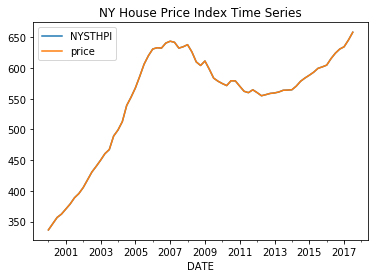

In [6]:
nyhpi_data.index = pd.to_datetime(nyhpi_data.DATE)
nyhpi_data.plot()
plt.title('NY House Price Index Time Series')
plt.show()

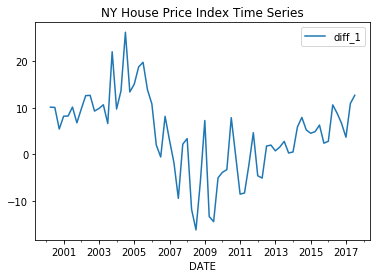

In [7]:
nyhpi_data['diff_1'] = nyhpi_data.price - nyhpi_data.price.shift()
nyhpi_data.plot(y='diff_1')
plt.title('NY House Price Index Time Series')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Text(0.5,1,'NY Home Prices PACF')

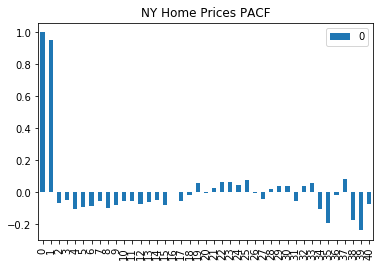

In [8]:
#Investigating partial autocorrelation function (PACF)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(nyhpi_data.price))
x_acf.plot(kind='bar')
plt.title('NY Home Prices PACF')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


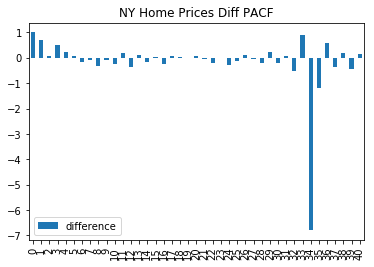

In [9]:
x_acf = pd.DataFrame(pacf(nyhpi_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title('NY Home Prices Diff PACF')
plt.legend(['difference'])

order - 

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(nyhpi_data.price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                   71
Model:                     ARMA(1, 0)   Log Likelihood                -263.643
Method:                       css-mle   S.D. of innovations              9.536
Date:                Tue, 06 Mar 2018   AIC                            533.286
Time:                        08:46:42   BIC                            540.074
Sample:                    01-01-2000   HQIC                           535.986
                         - 07-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         500.6350    149.916      3.339      0.001     206.805     794.465
ar.L1.price     0.9981      0.003    378.139      0.000       0.993       1.003
                                    Roots       

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(nyhpi_data.price, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                   71
Model:                     ARMA(1, 1)   Log Likelihood                -240.831
Method:                       css-mle   S.D. of innovations              6.830
Date:                Tue, 06 Mar 2018   AIC                            489.662
Time:                        08:46:49   BIC                            498.713
Sample:                    01-01-2000   HQIC                           493.262
                         - 07-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         503.3228    144.961      3.472      0.001     219.204     787.441
ar.L1.price     0.9967      0.005    219.834      0.000       0.988       1.006
ma.L1.price     0.8236      0.092      9.001    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  

The constant is 503. AR1 coefficient being approximately 0.93. Each day is approximately that of of previous quarter's value. The moving average term is approximately -.8, meaning that it will move against the previous error by about 82%. These two combine to show a is steadily at the same level as the previous value, but compensating back against any error.

In [19]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(nyhpi_data.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   70
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -222.889
Method:                       css-mle   S.D. of innovations              5.806
Date:                Tue, 06 Mar 2018   AIC                            453.777
Time:                        19:14:14   BIC                            462.771
Sample:                    04-01-2000   HQIC                           457.350
                         - 07-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.8747      3.777      1.556      0.125      -1.527      13.277
ar.L1.D.price     0.9301      0.049     19.025      0.000       0.834       1.026
ma.L1.D.price    -0.5669      0.110     

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  

The constant is 5.8747. AR1 coefficient being approximately 0.93. Each day is approximately 93% of previous quarter's value. The moving average term is approximately -.57, meaning that it will move against the previous error by about 60%. These two combine to show a is steadily at the same level as the previous value, but compensating back slightly against any error. First difference used to detrend the data. 

In [23]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(nyhpi_data.price, order=(1,2,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D2.price   No. Observations:                   69
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -220.232
Method:                       css-mle   S.D. of innovations              5.870
Date:                Tue, 06 Mar 2018   AIC                            448.464
Time:                        19:14:50   BIC                            457.400
Sample:                    07-01-2000   HQIC                           452.009
                         - 07-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0047      0.282      0.017      0.987      -0.548       0.558
ar.L1.D2.price     0.1749      0.165      1.060      0.293      -0.149       0.498
ma.L1.D2.price    -0.6803      0.106

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  

The constant is 0.0047. AR1 coefficient being approximately 0.17. Each day is approximately 17% of previous quarter's value. The moving average term is approximately -.68, meaning that it will move against the previous error by about 70%. 

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(nyhpi_data.price, order=(3,1,3))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   70
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -213.711
Method:                       css-mle   S.D. of innovations              5.057
Date:                Tue, 06 Mar 2018   AIC                            443.423
Time:                        08:47:13   BIC                            461.411
Sample:                    04-01-2000   HQIC                           450.568
                         - 07-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6287      3.537      1.591      0.117      -1.304      12.561
ar.L1.D.price     1.1852      0.246      4.817      0.000       0.703       1.667
ar.L2.D.price    -0.6101      0.433     

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


P-values are a way of approximating the likelihood that the coefficient has a significant effect on our outcome. It allows us to craft the 95% confidence interval for that coefficient. If zero is within that interval, than that coefficient is often considered to be potentially unnecessary.

The log-likelihood is a log of the likelihood that the given model would generate the data we see. The closer to zero, the higher the probablity we are to have predicted our outcome with our given model.

Residuals are the differences between prediction and observed quantity. 

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(nyhpi_data.price, order=(1,1,3))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   70
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -213.722
Method:                       css-mle   S.D. of innovations              5.044
Date:                Wed, 07 Mar 2018   AIC                            439.445
Time:                        09:15:27   BIC                            452.936
Sample:                    04-01-2000   HQIC                           444.803
                         - 07-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5713      3.529      1.579      0.119      -1.346      12.489
ar.L1.D.price     0.9012      0.062     14.585      0.000       0.780       1.022
ma.L1.D.price    -0.4150      0.112     

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [29]:
forecast = model_fit.forecast()[0]
print(forecast)

[668.415853]


Text(0.5,1,'Histogram of Residuals')

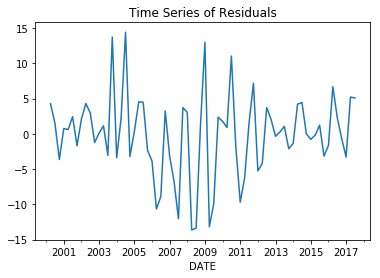

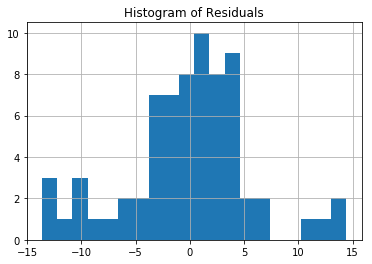

In [17]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

Residuals seem approximately standard normal.

Which model works best? 1 lag order, 1 differencing, and 3 moving average looks to be the best model. AIC was the lowest, and p values were below <0.05. 1 difference was used to detrend the data. The constant is 5.57. AR1 coefficient being approximately 0.9. Each day is approximately 90% of previous quarter's value. The moving average term is approximately -.4, meaning that it will move against the previous error by about 40%. 